In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import eli5

### Prepare data

In [2]:
tum = pd.read_excel('data_tum_prior_loc.xlsx', header=0)
tum = pd.get_dummies(tum, columns=['table location'])

X = tum.drop(['video', 'sequence'], axis=1)
y = tum.sequence

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
#cr = classification_report(y_test, y_pred)

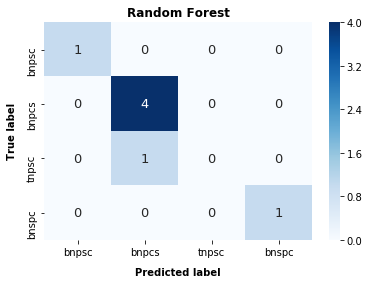

In [6]:
labels = [x for x in tum['sequence'].unique()]
df_cm = pd.DataFrame(cm, index = labels,
                    columns = labels)
sn.heatmap(df_cm, annot=True, cmap='Blues', annot_kws={'size':13})
plt.ylabel('True label', fontweight='bold', labelpad=10)
plt.xlabel('Predicted label', fontweight='bold', labelpad=10)
plt.title('Random Forest', fontweight='bold')
plt.show()

In [31]:
for feature in range(0, len(X.columns)):
    print(X.columns[feature] + ': ' + 
          str(round(rf.feature_importances_[feature], 2)))

prior1: 0.02
prior2: 0.01
prior3: 0.0
prior4: 0.2
prior5: 0.13
priordir1: 0.07
priordir2: 0.25
priordir3: 0.0
priordir4: 0.0
priordir5: 0.0
subject: 0.29
table location_c: 0.0
table location_d: 0.03


In [85]:
eli5.explain_weights(rf, feature_names=list(X.columns))

Weight,Feature
0.2899 ± 0.3792,subject
0.2469 ± 0.5920,priordir2
0.2033 ± 0.5563,prior4
0.1322 ± 0.5324,prior5
0.0705 ± 0.2828,priordir1
0.0253 ± 0.0970,table location_d
0.0238 ± 0.1429,prior1
0.0067 ± 0.0267,prior2
0.0015 ± 0.0091,table location_c
0 ± 0.0000,priordir5


### Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=0)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

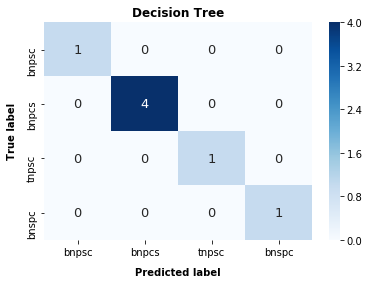

In [83]:
labels = [x for x in tum['sequence'].unique()]
df_cm = pd.DataFrame(cm, index = labels,
                    columns = labels)
sn.heatmap(df_cm, annot=True, cmap='Blues', annot_kws={'size':13})
plt.ylabel('True label', fontweight='bold', labelpad=10)
plt.xlabel('Predicted label', fontweight='bold', labelpad=10)
plt.title('Decision Tree', fontweight='bold')
plt.show()

In [46]:
for feature in range(0, len(X.columns)):
    print(X.columns[feature] + ': ' + 
          str(round(dt.tree_.compute_feature_importances()[feature], 2)))

prior1: 0.0
prior2: 0.0
prior3: 0.0
prior4: 0.54
prior5: 0.21
priordir1: 0.0
priordir2: 0.0
priordir3: 0.0
priordir4: 0.0
priordir5: 0.0
subject: 0.25
table location_c: 0.0
table location_d: 0.0


### Logistic Regression (Ridge)

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=0.1, random_state=0, solver='lbfgs',
                       multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

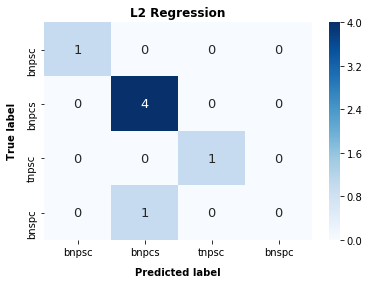

In [51]:
labels = [x for x in tum['sequence'].unique()]
df_cm = pd.DataFrame(cm, index = labels,
                    columns = labels)
sn.heatmap(df_cm, annot=True, cmap='Blues', annot_kws={'size':13})
plt.ylabel('True label', fontweight='bold', labelpad=10)
plt.xlabel('Predicted label', fontweight='bold', labelpad=10)
plt.title('L2 Regression', fontweight='bold')
plt.show()

In [74]:
eli5.explain_weights(lr, feature_names=list(X.columns))

Explanation(estimator="LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='multinomial',\n          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',\n          tol=0.0001, verbose=0, warm_start=False)", description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='bnpcs', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='prior5', weight=0.2265864338542165, std=None, value=None), FeatureWeight(feature='prior2', weight=0.07393932858260184, std=None, value=None), FeatureWeight(feature='priordir1', weight=0.05877051540392095, std=None, value=None), FeatureWeight(feature='prior1', weight=0.05874298349141519, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=0.018857417719275776, std=None, value=None), FeatureWeight(feature='table location_c', weight=0.015933729872375776, std=None, value=None)], neg=[FeatureWeight(feature='priordir2', weight=-0.2433768502996244, std=None, value=None), FeatureWeight(feature='prior4', weight=-0.16537377342568635, std=None, value=None), FeatureWeight(feature='prior3', weight=-0.06789703521323676, std=None, value=None), FeatureWeight(feature='subject', weight=-0.03160959618557544, std=None, value=None), FeatureWeight(feature='table location_d', weight=-0.015937171361438997, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None), TargetExplanation(target='bnpsc', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=1.9917669963649347, std=None, value=None), FeatureWeight(feature='prior4', weight=0.2266076796274832, std=None, value=None), FeatureWeight(feature='priordir2', weight=0.1274701768549636, std=None, value=None), FeatureWeight(feature='table location_c', weight=0.0023549808113034077, std=None, value=None)], neg=[FeatureWeight(feature='subject', weight=-0.22190014072951036, std=None, value=None), FeatureWeight(feature='prior5', weight=-0.12247618596164318, std=None, value=None), FeatureWeight(feature='prior2', weight=-0.11163597892667194, std=None, value=None), FeatureWeight(feature='prior3', weight=-0.07199226486454428, std=None, value=None), FeatureWeight(feature='prior1', weight=-0.035828898264397176, std=None, value=None), FeatureWeight(feature='priordir1', weight=-0.03581386128741609, std=None, value=None), FeatureWeight(feature='table location_d', weight=-0.0023568604334260478, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None), TargetExplanation(target='bnspc', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='prior2', weight=0.1673806821788022, std=None, value=None), FeatureWeight(feature='prior3', weight=0.1650431327390901, std=None, value=None), FeatureWeight(feature='subject', weight=0.07479730166556289, std=None, value=None), FeatureWeight(feature='priordir2', weight=0.0674766636163255, std=None, value=None), FeatureWeight(feature='table location_d', weight=0.0345088373794236, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.152312042530656, std=None, value=None), FeatureWeight(feature='prior4', weight=-0.10800072332426021, std=None, value=None), FeatureWeight(feature='prior5', weight=-0.061333942150155904, std=None, value=None), FeatureWeight(feature='table location_c', weight=-0.03450855107901431, std=None, value=None), FeatureWeight(feature='priordir1', weight=-0.01430459805436914

### AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=15, random_state=0)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

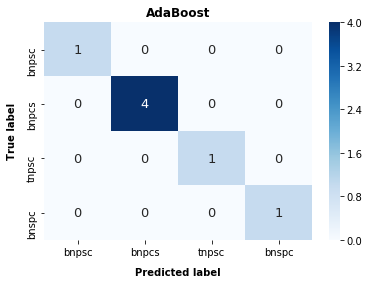

In [61]:
labels = [x for x in tum['sequence'].unique()]
df_cm = pd.DataFrame(cm, index = labels,
                    columns = labels)
sn.heatmap(df_cm, annot=True, cmap='Blues', annot_kws={'size':13})
plt.ylabel('True label', fontweight='bold', labelpad=10)
plt.xlabel('Predicted label', fontweight='bold', labelpad=10)
plt.title('AdaBoost', fontweight='bold')
plt.show()

In [86]:
eli5.explain_weights(ada, feature_names=list(X.columns))

Weight,Feature
0.4000 ± 0.9798,subject
0.2000 ± 0.8000,prior5
0.2000 ± 0.8000,prior3
0.1333 ± 0.6799,priordir2
0.0667 ± 0.4989,prior4
0 ± 0.0000,table location_d
0 ± 0.0000,table location_c
0 ± 0.0000,priordir5
0 ± 0.0000,priordir4
0 ± 0.0000,priordir3


### Neural network: MLP classifier

In [76]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(alpha=1, max_iter=100, random_state=0, solver='lbfgs')
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

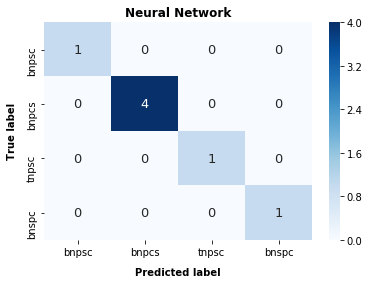

In [77]:
labels = [x for x in tum['sequence'].unique()]
df_cm = pd.DataFrame(cm, index = labels,
                    columns = labels)
sn.heatmap(df_cm, annot=True, cmap='Blues', annot_kws={'size':13})
plt.ylabel('True label', fontweight='bold', labelpad=10)
plt.xlabel('Predicted label', fontweight='bold', labelpad=10)
plt.title('Neural Network', fontweight='bold')
plt.show()

In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

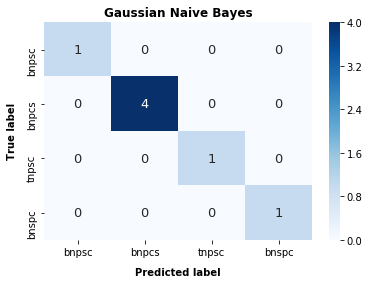

In [9]:
labels = [x for x in tum['sequence'].unique()]
df_cm = pd.DataFrame(cm, index = labels,
                    columns = labels)
sn.heatmap(df_cm, annot=True, cmap='Blues', annot_kws={'size':13})
plt.ylabel('True label', fontweight='bold', labelpad=10)
plt.xlabel('Predicted label', fontweight='bold', labelpad=10)
plt.title('Gaussian Naive Bayes', fontweight='bold')
plt.show()